#

In [164]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [165]:
df = pd.read_csv('/workspaces/machine-learning/midterm/data/NY-House-Dataset.csv')

In [166]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",41,-74
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",41,-74
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",41,-74
3,Brokered by COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",41,-74
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",41,-74


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [168]:
df.duplicated().sum()

np.int64(214)

In [169]:
df.drop_duplicates(inplace=True)

In [170]:
df.duplicated().sum()

np.int64(0)

EDA

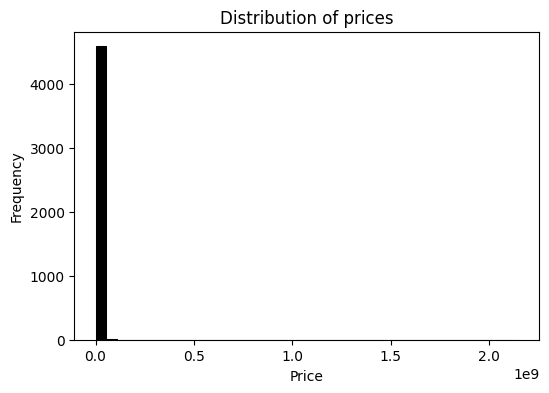

In [171]:
plt.figure(figsize=(6, 4))

sns.histplot(df['PRICE'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [172]:
# use interquartile range to remove price outliers
upper_limit = df['PRICE'].quantile(0.94) # 6MM
lower_limit = df['PRICE'].quantile(0.02) # 170K
baths_limit = df['BATH'].quantile(0.99) # 8 BATHS
beds_limit = 10

In [173]:
outliers = df[(df['PRICE'] < lower_limit) | (df['PRICE'] > upper_limit) | (df['BATH'] > baths_limit) | (df['BEDS'] > beds_limit)]
# drop rows containing outliers
df_new = df.drop(outliers.index)

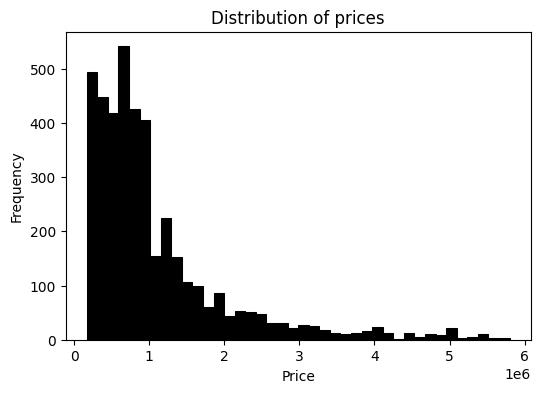

In [174]:
plt.figure(figsize=(6, 4))

sns.histplot(df_new['PRICE'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [175]:
df_new.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4144,4144,4144,4144,4144,4144
mean,1092656,3,2,1893,41,-74
std,965261,2,1,1025,0,0
min,169999,1,0,246,40,-74
25%,495000,2,1,1164,41,-74
50%,785000,3,2,2184,41,-74
75%,1295000,4,2,2184,41,-74
max,5799000,10,8,21000,41,-74


In [176]:
df_new['BEDS'].value_counts()

BEDS
3     1305
2      928
1      737
4      480
5      282
6      224
7       76
8       65
9       35
10      12
Name: count, dtype: int64

In [177]:
# Calculate skewness for each column
for column in df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = df_new[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: 2.1667822620576276
Skewness for BEDS: 1.1760618835597016
Skewness for BATH: 1.5369742023832909
Skewness for PROPERTYSQFT: 3.968623273362234
Skewness for LATITUDE: -0.046917732433040815
Skewness for LONGITUDE: -0.431698924351335


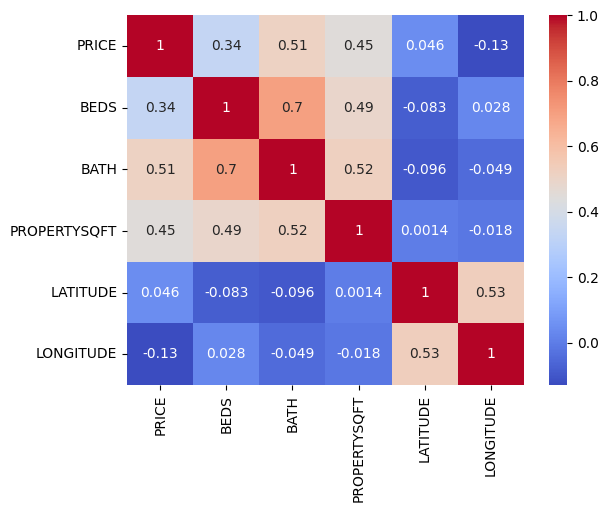

In [178]:
correlationn=pd.DataFrame()
for column in df_new.select_dtypes(include=[np.number]).columns:
    correlationn[column] = df_new[column]
relations=correlationn.corr()
sns.heatmap(relations, annot=True, cmap='coolwarm')
plt.show()


# Model Training

In [179]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [180]:
selected_cols = ['BEDS', 'BATH', 'PROPERTYSQFT','SUBLOCALITY','LATITUDE', 'LONGITUDE','PRICE']
subset_df = df_new[selected_cols]

In [181]:
subset_df.head()

,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,LATITUDE,LONGITUDE,PRICE
0,2,2,1400,Manhattan,41,-74,315000
2,4,2,2015,Richmond County,41,-74,260000
5,5,2,4004,Kings County,41,-74,690000
6,2,2,2184,New York,41,-74,899500
8,1,1,750,East Bronx,41,-74,265000


In [182]:
def train_val_test_split(df, target, train_size, val_size, test_size, random_state):
    
    df_full_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    val_portion = val_size / (train_size + val_size)
    df_train, df_val = train_test_split(df_full_train, test_size=val_portion, random_state=random_state)

    df_full_train = df_full_train.reset_index(drop=True)
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_full_train = df_full_train[target].values
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_full_train[target]
    del df_train[target]
    del df_val[target]
    del df_test[target]

    return df_full_train, df_train, df_test, df_val, y_full_train, y_train, y_val, y_test

In [183]:
# Remove rows where the values in 'col1' appear less than 10 times
filtered_df = subset_df.groupby('SUBLOCALITY').filter(lambda x: len(x) >= 10)

In [184]:
filtered_df.SUBLOCALITY.value_counts()

SUBLOCALITY
New York           871
Kings County       637
Queens County      631
Queens             510
Richmond County    450
Brooklyn           428
Bronx County       271
The Bronx          131
New York County    125
Staten Island       55
Manhattan           18
Name: count, dtype: int64

In [185]:
X_full_train, X_train, X_test, X_val, y_full_train, y_train, y_val, y_test = \
    train_val_test_split(df=filtered_df, target='PRICE', train_size=0.6, val_size=0.2, test_size=0.2, random_state=1)

In [186]:
def train_rf(df_train, y_train, random_state, n_estimators):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(dicts)

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict(X)

    return y_pred

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [193]:
dv, rf_model = train_rf(df_train=X_train, y_train=y_train, random_state=1, n_estimators=10)
y_pred = predict(df=X_test, dv=dv, model=rf_model)
round(rmse(y_test, y_pred),3)

np.float64(556840.519)

In [194]:
y_pred,y_val
compare = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
pd.set_option('display.float_format', '{:.0f}'.format)
# Display the DataFrame
print(compare)

     y_pred   y_test
0    851000   839000
1    954600  1080000
2    299670   184888
3   1209100  1900000
4    692578   599000
..      ...      ...
821  874400  1230250
822 3769400  2500000
823  326400   239000
824  816178   889000
825 1207100  1380000

[826 rows x 2 columns]


## Performance Tuning

In [197]:
def train_rf2(df_train, y_train, n_estimators, depth):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(dicts)

    model = RandomForestRegressor(max_depth=depth, n_estimators=n_estimators, random_state=1, n_jobs=-1)
    model.fit(X_train, y_train)
    
    return dv, model

In [198]:
all_rmse = {}
for depth in [10, 15, 20, 25]:
    print('depth: %s' % depth)
    rmse_vals = []
    for i in range(10, 201, 10):
        dv, rf_model = train_rf2(df_train=X_train, y_train=y_train, n_estimators=i, depth=depth)
        y_pred = predict(df=X_val, dv=dv, model=rf_model)
        rmse_val = round(rmse(y_val, y_pred),3)
        # print('%s -> %.3f' % (i, rmse_val))
        rmse_vals.append(rmse_val)
    all_rmse[depth] = np.mean(rmse_vals)

depth: 10
depth: 15
depth: 20
depth: 25


In [199]:
all_rmse

{10: np.float64(531369.021),
 15: np.float64(525970.9872000001),
 20: np.float64(525714.7538000001),
 25: np.float64(526505.4917499999)}

depth use 20 

In [202]:
all_rmse_dep20 = {}

for i in range(10, 201, 10):
    dv, rf_model = train_rf2(df_train=X_train, y_train=y_train, n_estimators=i, depth=20)
    y_pred = predict(df=X_val, dv=dv, model=rf_model)
    rmse_val = round(rmse(y_val, y_pred),3)
    print('%s -> %.3f' % (i, rmse_val))
    all_rmse_dep20[i] = rmse_val

10 -> 538162.004
20 -> 528835.609
30 -> 528208.937
40 -> 526382.624
50 -> 526690.914
60 -> 524656.330
70 -> 525956.303
80 -> 525524.659
90 -> 523872.368
100 -> 524260.086
110 -> 525051.835
120 -> 524270.087
130 -> 523159.031
140 -> 523206.248
150 -> 524052.512
160 -> 525247.257
170 -> 524812.653
180 -> 524123.175
190 -> 523397.530
200 -> 524424.914


n_estimator use 90

In [203]:
dv, rf_model = train_rf2(df_train=X_train, y_train=y_train, n_estimators=90, depth=20)
importances = list(zip(dv.feature_names_, rf_model.feature_importances_))
df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
0,BATH,0
4,PROPERTYSQFT,0
2,LATITUDE,0
3,LONGITUDE,0
9,SUBLOCALITY=New York,0
1,BEDS,0
10,SUBLOCALITY=New York County,0
7,SUBLOCALITY=Kings County,0
12,SUBLOCALITY=Queens County,0
8,SUBLOCALITY=Manhattan,0


# EDA, feature importance analysis

# Model selection process and parameter tuning